<a href="https://colab.research.google.com/github/ElhaliAmina/DataMaining/blob/main/DM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
import operator
from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np
import time 
from itertools import cycle

from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, auc


# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [32]:
#import Demographie data
Dem = '/content/Démographie_fData.xlsx'
d_Dem= pd.read_excel(Dem,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [26]:
#import Examination data
EX = '/content/examination.xlsx'
d_EX= pd.read_excel(EX,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [27]:
d_EX.head()

,SEQN,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXHIP,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,DXAFMRST,DXXFMBCC,DXXOFBMD,DXXOFBMC,DXXOFA,DXXTRBMD,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXASPNST,DXXOSBCC,DXXOSBMD,DXXOSBMC,...,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHXRCAR,OHXRCARO,OHXRRES,OHXRRESO,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,OHDRCSTS,OHAREC,OHAROCDT,OHAPOS
0,93703,1,13.7,88.6,17.5,38.0,18.0,16.2,48.2,104.0,1,4,66,1,1,140,116,72,2,116,66,2,116,68,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,10,1,1,1,1,1,1,1,1,1,1,9,8,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
1,93704,1,13.9,94.2,15.7,38.0,18.6,15.2,50.0,104.0,1,4,66,1,1,140,116,72,2,116,66,2,116,68,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,10,1,1,1,1,1,1,1,1,1,1,9,8,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
2,93705,1,79.5,158.3,31.7,37.0,36.0,32.0,101.8,110.0,1,4,52,1,1,220,116,72,2,116,66,2,202,62,2,1,0,1.058,36.42,34.44,0.744,1.246,25.75,20.67,0.585,0.64,1,0,1.165,69.10,...,1,7,3,3,10,10,10,9,10,10,3,3,7,1,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
3,93706,1,66.3,175.7,21.5,46.6,38.8,27.0,79.3,94.4,1,3,82,1,1,140,112,74,2,114,70,2,108,76,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,7,2,10,10,10,10,10,9,10,10,10,10,8,7,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,1
4,93707,1,45.4,158.4,18.1,38.1,33.8,21.5,64.1,83.0,1,2,100,1,1,140,128,38,2,128,46,2,128,58,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,8,1,10,10,10,10,9,10,10,1,10,8,7,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,9,0,9,0,9,1,4,1,1


In [31]:
#import Questionnaire data
Ques = '/content/Questionnaire.xlsx'
d_Ques= pd.read_excel(Ques,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [30]:
#import Laboratory data
Lab = '/content/labf.xlsx'
d_Lab= pd.read_excel(Lab,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

# Dividing categorical and numerical

In [33]:
def split_columns(df):
    col = [c for c in df.columns if c not in ['SEQN']]
    numclasses=[]
    for c in col:
        numclasses.append(len(df[c].unique()))
    threshold=10
    np.array(numclasses).size
    categorical_variables = list(np.array(col)[np.array(numclasses) < threshold])
    numerical_variables = set(df.columns)^set(categorical_variables)
    return categorical_variables, numerical_variables

In [34]:
#questionaire data
ques_cat, ques_cont = split_columns(d_Ques)
ques_obj = d_Ques[list(ques_cont)].select_dtypes(include=['object']).columns
ques_cont = set(ques_cont)^set(ques_obj)

In [35]:
#demographic data
demo_cat, demo_cont = split_columns(d_Dem)
demo_obj = d_Dem[list(demo_cont)].select_dtypes(include=['object']).columns
demo_cont = set(demo_cont)^set(demo_obj)

In [36]:
#exam data
exam_cat, exam_cont = split_columns(d_EX)
exam_obj = d_EX[list(exam_cont)].select_dtypes(include=['object']).columns
exam_cont = set(exam_cont)^set(exam_obj)

In [37]:
#labs data
labs_cat, labs_cont = split_columns(d_Lab)
labs_obj = d_Lab[list(labs_cont)].select_dtypes(include=['object']).columns
labs_cont = set(labs_cont)^set(labs_obj)

In [38]:
labs_cat

['URDUMALC',
 'URDUCRLC',
 'LBDSATLC',
 'LBDSGTLC',
 'LBDSTBLC',
 'LBDBANO',
 'LBDBCRLC',
 'LBDBCOLC',
 'LBDSF5LC',
 'LBDSF6LC',
 'LBXHA',
 'LBXHBC',
 'LBXHBS']

In [39]:
#assert check whether we have covered all the features
assert len(ques_cat) + len(ques_cont) +len(ques_obj)  == len(d_Ques.columns)
assert len(demo_cat) + len(demo_cont) +len(demo_obj) == len(d_Dem.columns)
assert len(exam_cat) + len(exam_cont) +len(exam_obj) == len(d_EX.columns)
assert len(labs_cat) + len(labs_cont) +len(labs_obj) == len(d_Lab.columns)

# Combining and Merging dataframes into single df

In [40]:
d_EX.head()

,SEQN,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXHIP,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,DXAFMRST,DXXFMBCC,DXXOFBMD,DXXOFBMC,DXXOFA,DXXTRBMD,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXASPNST,DXXOSBCC,DXXOSBMD,DXXOSBMC,...,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHXRCAR,OHXRCARO,OHXRRES,OHXRRESO,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,OHDRCSTS,OHAREC,OHAROCDT,OHAPOS
0,93703,1,13.7,88.6,17.5,38.0,18.0,16.2,48.2,104.0,1,4,66,1,1,140,116,72,2,116,66,2,116,68,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,10,1,1,1,1,1,1,1,1,1,1,9,8,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
1,93704,1,13.9,94.2,15.7,38.0,18.6,15.2,50.0,104.0,1,4,66,1,1,140,116,72,2,116,66,2,116,68,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,10,1,1,1,1,1,1,1,1,1,1,9,8,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
2,93705,1,79.5,158.3,31.7,37.0,36.0,32.0,101.8,110.0,1,4,52,1,1,220,116,72,2,116,66,2,202,62,2,1,0,1.058,36.42,34.44,0.744,1.246,25.75,20.67,0.585,0.64,1,0,1.165,69.10,...,1,7,3,3,10,10,10,9,10,10,3,3,7,1,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,0,0,0,0,9,1,4,1,1
3,93706,1,66.3,175.7,21.5,46.6,38.8,27.0,79.3,94.4,1,3,82,1,1,140,112,74,2,114,70,2,108,76,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,7,2,10,10,10,10,10,9,10,10,10,10,8,7,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,1
4,93707,1,45.4,158.4,18.1,38.1,33.8,21.5,64.1,83.0,1,2,100,1,1,140,128,38,2,128,46,2,128,58,2,1,0,0.897,25.74,32.22,0.711,1.015,20.57,23.55,0.471,0.61,1,0,0.980,46.12,...,8,8,1,10,10,10,10,9,10,10,1,10,8,7,2,2,2,2,9,0,0,0,0,0,0,0,0,9,9,0,0,9,0,9,0,9,1,4,1,1


In [41]:
d_EX.drop(['SEQN'], axis = 1, inplace=False)
d_Lab.drop(['SEQN'], axis = 1, inplace=True)
d_Ques.drop(['SEQN'], axis = 1, inplace=True)

#joining all dataframes into single

df = pd.concat([d_Dem, d_EX], axis=1, join='inner')
df = pd.concat([df, d_Lab], axis=1, join='inner')
df = pd.concat([df, d_Ques], axis=1, join='inner')

In [42]:
df.head()

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,SEQN,BMDSTATS,BMXWT,...,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBDSF5LC,LBXSF6SI,LBDSF6LC,LBXGH,WTSAF2YR,LBXGLU,LBDGLUSI,LBDHDD,LBDHDDSI,LBXHA,LBXHBC,LBXHBS,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050
0,93703,2,2,2,5,6,2,1,1,4,1,1,1,2,1,2,2,1,2,2,5,5,3,0,0,1,2,3,1,3,9246.491865,8539.731348,2,145,15,15,5.00,93703,1,13.7,...,1.0,3.4,0.6,4.2,0.2,0.1,5.48,11.9,36.7,67.0,21.7,32.4,15.6,309,7.9,0.0,0.29,5.58,1,0.20,3.39,0,1,1.160,0,6.2,0.000000,97,5.38,60,1.55,1,1,1,2,2,2,2,2,2
1,93704,2,1,2,3,3,1,1,1,4,1,1,1,2,1,2,2,1,2,2,4,4,2,0,0,1,2,3,1,2,37338.768343,42566.614750,1,143,15,15,5.00,93704,1,13.9,...,0.8,1.5,0.6,3.7,0.3,0.0,5.24,16.3,47.0,89.7,31.1,34.7,12.2,233,6.6,0.0,0.29,5.58,1,0.14,2.38,0,1,0.831,0,5.2,0.000000,97,5.38,47,1.22,2,2,2,2,2,2,2,2,2
2,93705,2,2,66,4,4,2,1,1,2,3,1,2,2,1,2,2,1,2,2,1,1,0,0,1,2,4,1,2,2,8614.571172,8338.419786,2,145,3,3,0.82,93705,1,79.5,...,0.5,4.2,0.7,6.1,0.2,0.1,5.02,14.5,42.1,83.9,28.9,34.4,13.6,348,8.5,0.2,0.29,5.58,1,0.14,2.38,0,1,3.620,0,5.6,0.000000,97,5.38,68,1.76,2,2,2,2,2,2,2,1,2
3,93706,2,1,18,5,6,2,1,1,4,1,1,2,2,1,2,2,1,2,2,5,5,0,0,1,1,4,3,1,2,8548.632619,8723.439814,2,134,15,15,5.00,93706,1,66.3,...,0.7,1.9,0.4,3.6,0.1,0.0,4.59,13.2,39.9,86.8,28.8,33.1,13.4,226,9.1,0.2,0.29,5.58,1,0.16,2.72,0,0,1.220,0,6.2,25653.677102,122,6.77,88,2.28,1,1,1,2,2,2,2,2,2
4,93707,2,1,13,5,7,2,1,1,4,1,1,1,2,1,2,2,1,2,2,7,7,0,3,0,1,3,2,1,3,6769.344567,7064.609730,1,138,10,10,1.88,93707,1,45.4,...,0.6,1.9,0.5,4.8,0.1,0.0,5.13,15.4,45.5,88.8,30.0,33.8,15.7,228,9.0,0.0,0.70,13.46,0,0.34,5.77,0,1,1.940,0,6.3,0.000000,97,5.38,65,1.68,1,2,2,2,2,2,2,2,2


In [43]:
df.shape

(7936, 371)

# Initial cleaning - Removing na's if in rows and columns from the merged dataframe

In [44]:
lst = df.columns[df.isna().all()].tolist()
df.dropna(axis=1, how='all',inplace=True)
df.dropna(axis=0, how='all',inplace=True)
df.shape

(7936, 371)

In [45]:
# 0 :Diabete & 1: preDiabete & 2:Diabete
df.loc[(df['LBXGLU'] < 100) , 'Diabetes'] = 0
df.loc[((df['LBXGLU'] >= 100) & (df['LBXGH'] <= 125)) , 'Diabetes'] = 1
df.loc[(df['LBXGLU'] > 125) , 'Diabetes'] = 2

In [46]:
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 1)), 'Diabetes'] = 2
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 3)), 'Diabetes'] = 1
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 2)), 'Diabetes'] = 0

In [47]:
##removing the rows with nan diabetes values 
df = df[np.isfinite(df['Diabetes'])]

In [48]:
df.shape

(7936, 372)

In [49]:
df.Diabetes.value_counts()

0.0    6180
1.0    1346
2.0     410
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Number of counts')

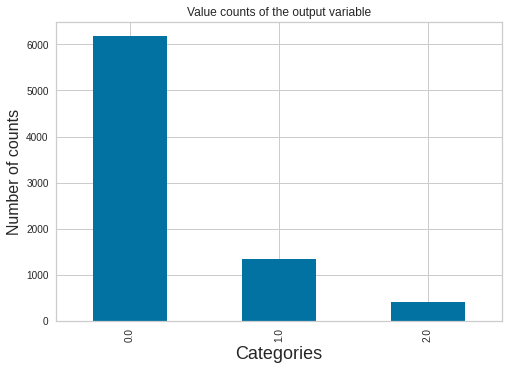

In [50]:
pd.value_counts(df['Diabetes']).plot(kind="bar", title='Value counts of the output variable')
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Number of counts', fontsize=16)

In [52]:
cat_vars = ques_cat+demo_cat+exam_cat+labs_cat
cat_vars = [x for x in cat_vars if x not in lst]
num_vars = list(ques_cont)+list(demo_cont)+list(exam_cont)+list(labs_cont)
num_vars = [x for x in num_vars if x not in lst]
obj_vars = list(set(df.columns)^set(cat_vars)^set(num_vars))

In [55]:
cat_vars

['DIQ010',
 'DIQ160',
 'DIQ170',
 'DIQ172',
 'DIQ180',
 'DIQ050',
 'RIDSTATR',
 'RIAGENDR',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'DMDBORN4',
 'DMDCITZN',
 'DMDEDUC2',
 'DMDMARTL',
 'SIALANG',
 'SIAPROXY',
 'SIAINTRP',
 'FIALANG',
 'FIAPROXY',
 'FIAINTRP',
 'MIALANG',
 'MIAPROXY',
 'MIAINTRP',
 'DMDHHSIZ',
 'DMDFMSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'DMDHHSZE',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'SDMVPSU',
 'BMDSTATS',
 'BPAARM',
 'BPACSZ',
 'BPXPULS',
 'BPXPTY',
 'BPAEN1',
 'BPAEN2',
 'BPAEN3',
 'DXAFMRST',
 'DXXFMBCC',
 'DXASPNST',
 'DXXOSBCC',
 'DXAEXSTS',
 'DXAHEBV',
 'DXAHETV',
 'DXALABV',
 'DXALATV',
 'DXALLBV',
 'DXALLTV',
 'DXARABV',
 'DXARATV',
 'DXARLBV',
 'DXARLTV',
 'DXATRBV',
 'DXATRTV',
 'LUAXSTAT',
 'LUAPNME',
 'OHDEXSTS',
 'OHDDESTS',
 'OHXIMP',
 'OHX01TC',
 'OHX02TC',
 'OHX03TC',
 'OHX04TC',
 'OHX05TC',
 'OHX06TC',
 'OHX07TC',
 'OHX08TC',
 'OHX09TC',
 'OHX10TC',
 'OHX11TC',
 'OHX12TC',
 'OHX13TC',
 'OHX14TC',
 'OHX15TC',
 'OHX16TC',
 'OHX17

In [56]:
X = df.drop(labels = ['Diabetes','LBXGLU','DIQ010'], axis=1).values
y = df['Diabetes'].values
X = StandardScaler().fit_transform(X)

In [57]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

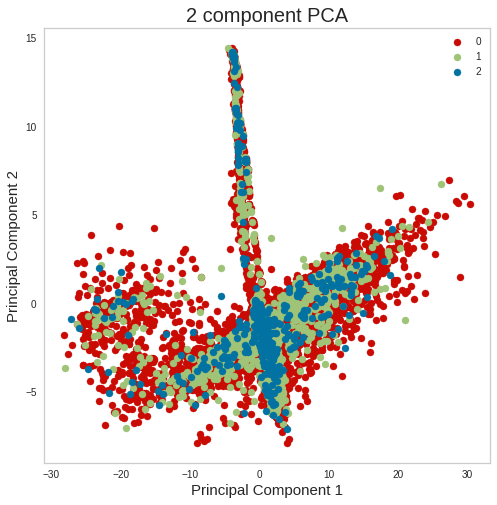

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [59]:
pca.explained_variance_ratio_

array([0.14909077, 0.06193202])

In [60]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

In [61]:
pca.explained_variance_ratio_

array([0.14909077, 0.06193202, 0.04439619])

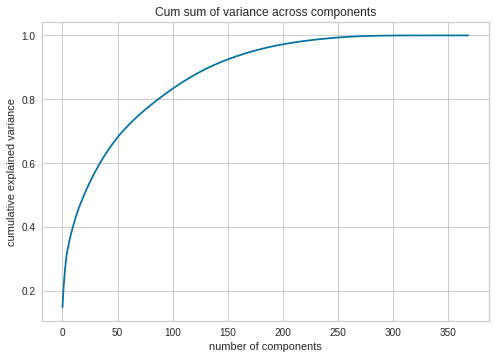

In [62]:
## obtain all the components and plot the cumulatie explained variance with respect to the number of components
pca =  PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cum sum of variance across components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');